# Visualizing Geographic Data in Python

## Basic Setup

In [1]:
import datetime
# prints the present date and time as a form of log
print("This notebook was late run: ", datetime.datetime.now())

This notebook was late run:  2019-01-16 16:33:01.320521


In [2]:
# key packages
import pandas as pd
import numpy as np

## Choropleth Maps

We'll start by building a choropleth map of the United States to show % of GDP by state as of 2017. The data I used were taken from the [U.S. Bureau of Economic Analysis](https://apps.bea.gov/itable/iTable.cfm?ReqID=70&step=1).

For the documentation from Plotly on how to build these types of choropleth maps, [check out this link here](https://plot.ly/python/choropleth-maps/). For a helpful walkthrough article, [check out this link here](https://medium.com/@kbrook10/day-8-data-visualization-how-to-use-choropleth-maps-63c0fedfd5e7).

In [3]:
# importing the dataset of % of US GDP by state from the CSV
gdp_perc_state_df = pd.read_csv(filepath_or_buffer = './data/perc_us_gdp_by_state_2017.csv')

# inspecting the data
gdp_perc_state_df.head()

,GeoFips,GeoName,State,2017
0,1000,Alabama,AL,1.1
1,2000,Alaska,AK,0.3
2,4000,Arizona,AZ,1.7
3,5000,Arkansas,AR,0.6
4,6000,California,CA,14.4


In [11]:
# making a few additions / alterations to the base data prior to building the viz

# creating a rank column for percent contribution to GDP
# this way we can call out which state is the #1, #2, #n contributor more easily
gdp_perc_state_df['rank'] = gdp_perc_state_df['2017'].rank(ascending=False).astype(int)

# editing the text to display in the tooltip
gdp_perc_state_df['text'] = gdp_perc_state_df['GeoName'] + " made up " +\
    gdp_perc_state_df['2017'].astype(str) + "% of US GDP in 2017, ranking at position " +\
    gdp_perc_state_df['rank'].astype(str) + " in terms of % contribution to US GPD."

# final check on structure of data
gdp_perc_state_df.head()

,GeoFips,GeoName,State,2017,rank,text
0,1000,Alabama,AL,1.1,26,"Alabama made up 1.1% of US GDP in 2017, rankin..."
1,2000,Alaska,AK,0.3,46,"Alaska made up 0.3% of US GDP in 2017, ranking..."
2,4000,Arizona,AZ,1.7,20,"Arizona made up 1.7% of US GDP in 2017, rankin..."
3,5000,Arkansas,AR,0.6,36,"Arkansas made up 0.6% of US GDP in 2017, ranki..."
4,6000,California,CA,14.4,1,"California made up 14.4% of US GDP in 2017, ra..."
5,8000,Colorado,CO,1.8,17,"Colorado made up 1.8% of US GDP in 2017, ranki..."
6,9000,Connecticut,CT,1.4,23,"Connecticut made up 1.4% of US GDP in 2017, ra..."
7,10000,Delaware,DE,0.4,41,"Delaware made up 0.4% of US GDP in 2017, ranki..."
8,11000,District of Columbia,DC,0.7,34,District of Columbia made up 0.7% of US GDP in...
9,12000,Florida,FL,5.0,4,"Florida made up 5.0% of US GDP in 2017, rankin..."


In [5]:
# key packages to work offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [6]:
# this can sometimes be finicky; if you run into errors, update your packages, as below
# !pip install plotly --upgrade

# enabling the needed jupyter lab extension, and checking to be sure it's running
!jupyter labextension enable @jupyterlab/plotly-extension
!jupyter labextension list

JupyterLab v0.35.4
Known labextensions:
   app dir: /Users/pauljeffries/anaconda3/share/jupyter/lab
        @jupyterlab/plotly-extension v0.18.1  enabled  OK


In [7]:
# run the below at the start of every nb to use plotly.offline. 
# this injects the plotly.js source files into the notebook.
init_notebook_mode(connected=True)

In [8]:
# building the figure out of its components: data and layout

# building the data
data = [ dict(
        type='choropleth',
        # you could define your own scale; I chose not to here
        autocolorscale = True,
        # 'locations' is your geo variable
        locations = gdp_perc_state_df['State'],
        locationmode = 'USA-states',
        # 'z' is whatever stat feeds the values for the choropleth map
        z = gdp_perc_state_df['2017'].astype(float),
        # setting the tooltip text
        text = gdp_perc_state_df['text'],
        marker = dict(
            line = dict(
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "% of GDP"
        )
) ]

# crafting the layout
layout = dict(
        title = '% of US GDP by State (2017)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(85, 173, 240)')
)
 
# compiling the figure
fig = dict(data=data, layout=layout)

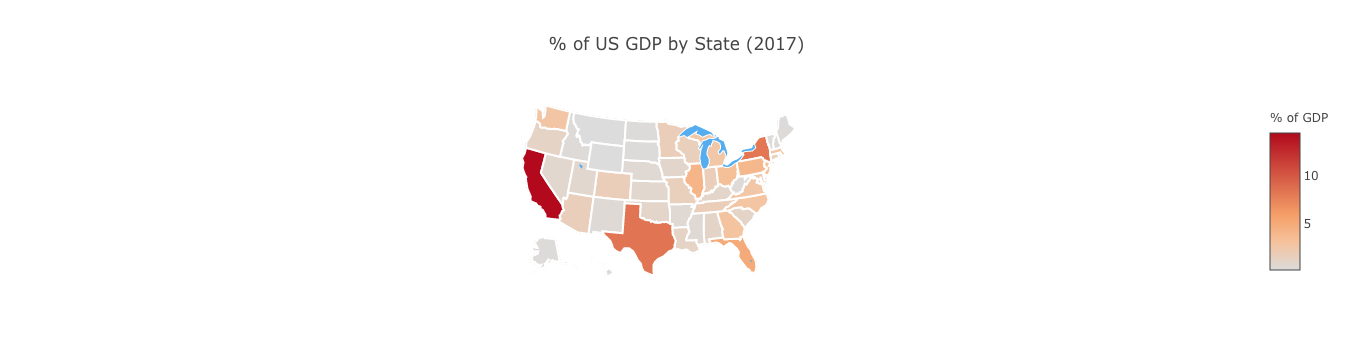

In [9]:
# using iplot to display in the jupyter notebook
# if you're reading this on GitHub this won't display
# check the "output_viz" folder in this directory on GitHub to see the saved viz
iplot(fig, filename='us_states_gdp_map.html' )

In [10]:
# using plot to save locally and open in new tab
plot(fig, filename='output_viz/us_states_gdp_map.html' )

'file:///Users/pauljeffries/Desktop/personal/personal_code/data-science-toolkit-master/eda-and-visualization/output_viz/us_states_gdp_map.html'